<a href="https://colab.research.google.com/github/DAYSIMAOSS/melhorescompras/blob/main/centros_distribuicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ATIVIDADE 2 — ANÁLISE DE CENTROS DE DISTRIBUIÇÃO
# FIAP — Melhores Compras


# Instalação de pacotes (somente se necessário)
!pip install pandas matplotlib scikit-learn seaborn --quiet

# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)


In [9]:
import pandas as pd
import io

# Já fez o upload
# uploaded = files.upload()

# Nome real do arquivo registrado no Colab
filename = 'Fiap On - Fase 6 - Geolocalização Dataset - Asset (2).csv'

# Carregar CSV
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("✅ Dados carregados com sucesso!")
df.head()


✅ Dados carregados com sucesso!


,latitude,longitude,price
0,"-21,591360","-51,066690","52,47"
1,"-21,285350","-49,654970","37,03"
2,"-22,025900","-47,067020","71,50"
3,"-21,916230","-46,686660","88,27"
4,"-22,476390","-46,632780","36,16"


In [10]:
# Substituir vírgula por ponto e converter para float
df['latitude'] = df['latitude'].str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].str.replace(',', '.').astype(float)
df['price'] = df['price'].str.replace(',', '.').astype(float)

# Conferir se os dados foram convertidos corretamente
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   653 non-null    float64
 1   longitude  653 non-null    float64
 2   price      653 non-null    float64
dtypes: float64(3)
memory usage: 15.4 KB


In [11]:
# Mostrar as primeiras 20 linhas do DataFrame
df.head(20)


,latitude,longitude,price
0,-21.59136,-51.06669,52.47
1,-21.28535,-49.65497,37.03
2,-22.02590,-47.06702,71.50
3,-21.91623,-46.68666,88.27
4,-22.47639,-46.63278,36.16
5,-22.85764,-49.25362,22.67
6,-22.60238,-47.87481,85.49
7,-22.58942,-49.16164,67.59
8,-23.53745,-47.86273,34.31
9,-21.92954,-51.39519,51.08


In [12]:
# Verificar duplicatas
print("Número de linhas duplicadas:", df.duplicated().sum())

# Remover duplicatas, se houver
df = df.drop_duplicates()
print("✅ Duplicatas removidas, se existiam.")


Número de linhas duplicadas: 0
✅ Duplicatas removidas, se existiam.


In [13]:
# Filtrar valores fora do intervalo
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]
print("✅ Coordenadas dentro dos intervalos válidos.")


✅ Coordenadas dentro dos intervalos válidos.


In [14]:
# Filtrar valores de price inválidos
df = df[df['price'] > 0]
print("✅ Valores de entrega válidos (price > 0).")


✅ Valores de entrega válidos (price > 0).


In [15]:
df = df.reset_index(drop=True)
print("✅ Índice resetado após limpeza.")


✅ Índice resetado após limpeza.


In [16]:
# Conferir primeiras linhas e estatísticas gerais
print(df.head(20))
print(df.describe())


    latitude  longitude   price
0  -21.59136  -51.06669   52.47
1  -21.28535  -49.65497   37.03
2  -22.02590  -47.06702   71.50
3  -21.91623  -46.68666   88.27
4  -22.47639  -46.63278   36.16
5  -22.85764  -49.25362   22.67
6  -22.60238  -47.87481   85.49
7  -22.58942  -49.16164   67.59
8  -23.53745  -47.86273   34.31
9  -21.92954  -51.39519   51.08
10 -20.53889  -49.10219   30.34
11 -21.00412  -47.39795   52.65
12 -21.63149  -50.19601   45.09
13 -23.52259  -47.28373   70.78
14 -20.27757  -49.91405  100.87
15 -22.07944  -51.47194   27.38
16 -22.08676  -49.73512   81.83
17 -22.45669  -49.76243   56.47
18 -22.71408  -47.29009   98.48
19 -21.71797  -48.01568   76.77
         latitude   longitude       price
count  653.000000  653.000000  653.000000
mean   -22.151112  -48.636021   63.068622
std      1.176863    1.736983   28.200606
min    -25.014720  -52.819420   12.120000
25%    -23.056670  -50.040700   39.160000
50%    -22.210560  -48.615830   65.020000
75%    -21.184130  -47.290090   85

In [17]:
# Normalização das coordenadas (latitude e longitude)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df[['latitude', 'longitude']])
print("✅ Normalização concluída!")


✅ Normalização concluída!


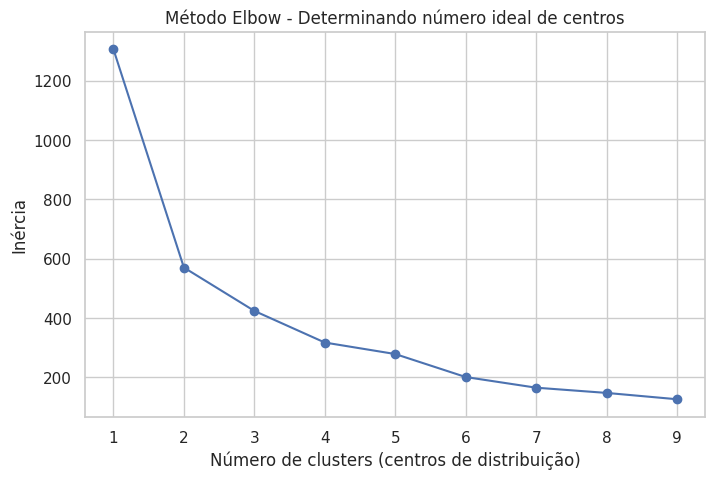

In [18]:
# Determinar o número ideal de centros (clusters)

inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Número de clusters (centros de distribuição)")
plt.ylabel("Inércia")
plt.title("Método Elbow - Determinando número ideal de centros")
plt.show()


In [19]:
# Clusterização final
# Substitua 'k' pelo número escolhido após o Elbow

k = 4  # Exemplo, substitua pelo valor ideal
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(coords_scaled)

print(f"✅ Clusterização concluída com k={k}")
df.head(20)


✅ Clusterização concluída com k=4


,latitude,longitude,price,cluster
0,-21.59136,-51.06669,52.47,0
1,-21.28535,-49.65497,37.03,0
2,-22.02590,-47.06702,71.50,3
3,-21.91623,-46.68666,88.27,3
4,-22.47639,-46.63278,36.16,1
5,-22.85764,-49.25362,22.67,2
6,-22.60238,-47.87481,85.49,2
7,-22.58942,-49.16164,67.59,2
8,-23.53745,-47.86273,34.31,1
9,-21.92954,-51.39519,51.08,0


In [20]:
# Valor total de entregas atendidas por cada centro

cluster_valor_total = df.groupby('cluster')['price'].sum()
print("\n💰 Valor total das entregas por centro de distribuição:")
print(cluster_valor_total)



💰 Valor total das entregas por centro de distribuição:
cluster
0    11971.48
1    12425.34
2     7432.42
3     9354.57
Name: price, dtype: float64


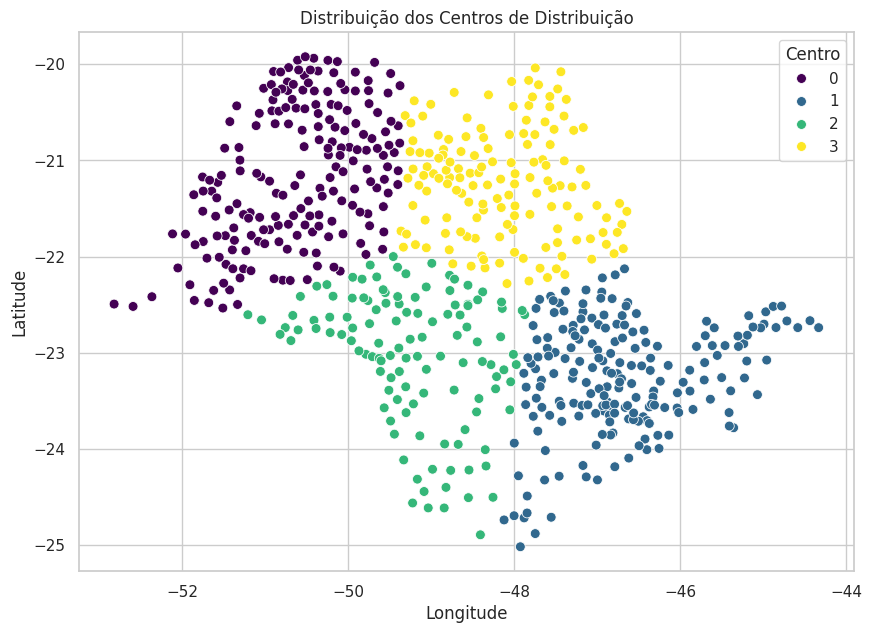

In [21]:
# Visualização dos clusters
# ===============================================
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='longitude', y='latitude',
    hue='cluster',
    palette='viridis',
    data=df,
    s=50
)
plt.title("Distribuição dos Centros de Distribuição")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Centro")
plt.show()


In [23]:
#Conclusão

print("""
✅ Atividade 2 concluída!

Algoritmo utilizado: K-Means
Número de centros sugerido: {0}

A análise mostrou clusters bem distribuídos geograficamente,
permitindo identificar os melhores locais para instalar centros de distribuição.
O valor total de entregas atendidas por cada centro foi calculado, auxiliando na tomada de decisão.

Próximo passo: gerar o PDF com os gráficos e essa conclusão.
""".format(k))


✅ Atividade 2 concluída!

Algoritmo utilizado: K-Means
Número de centros sugerido: 4

A análise mostrou clusters bem distribuídos geograficamente, 
permitindo identificar os melhores locais para instalar centros de distribuição. 
O valor total de entregas atendidas por cada centro foi calculado, auxiliando na tomada de decisão.

Próximo passo: gerar o PDF com os gráficos e essa conclusão.

